## Plot overall precision at predicted probability threshold along with domains boxplots

The line: if a user were to take all the positions with predicted probability above a certain threshold, what's the precision?

The boxplots: Showing our ability to predict for domains that bind the ligand. For exmaple, it can show when the line isn't at 1, but the boxplot is sitting high, that the drop in precision is due to domains that don't this ligand at all.

In [1]:
#Imports
library(ggplot2)
library(reshape2)
library(Rmisc)
library(RColorBrewer)
library(viridis)
library(ggpubr)
library(repr)

Loading required package: lattice
Loading required package: plyr
Loading required package: viridisLite
Loading required package: magrittr


In [2]:
# Define constants for reading the data
data_path <- "/home/anat/Research/ExAC/12.Figures/Global_precision_vs_prob/domains_prec_tables/"
ligands_comb_list <- c("dna", "rna", "ion", "peptide",  "sm")
folds_num <- "5"
model <- "XGB"
table_type <- "tuned_not_stacked"

In [3]:
# Colors for the color gradient guide of the global precision
colfunc<-colorRampPalette(c("#fecc5c", "#fd8d3c", "#f03b20", "#bd0026", "#a50f15"))

# Colors for the color gradient of the positives fraction
#coldomain <- colorRampPalette(c("#8c510a", "#bf812d", "#dfc27d", "#f6e8c3", "#c7eae5", "#80cdc1", "#35978f", "#01665e"))
#coldomain <- colorRampPalette(c("#01665e", "#35978f", "#80cdc1", "#c7eae5", "#f6e8c3", "#dfc27d", "#bf812d", "#8c510a"))
coldomain <- colorRampPalette(c("#f1eef6", "#bdc9e1", "#74a9cf", "#2b8cbe", "#045a8d"))

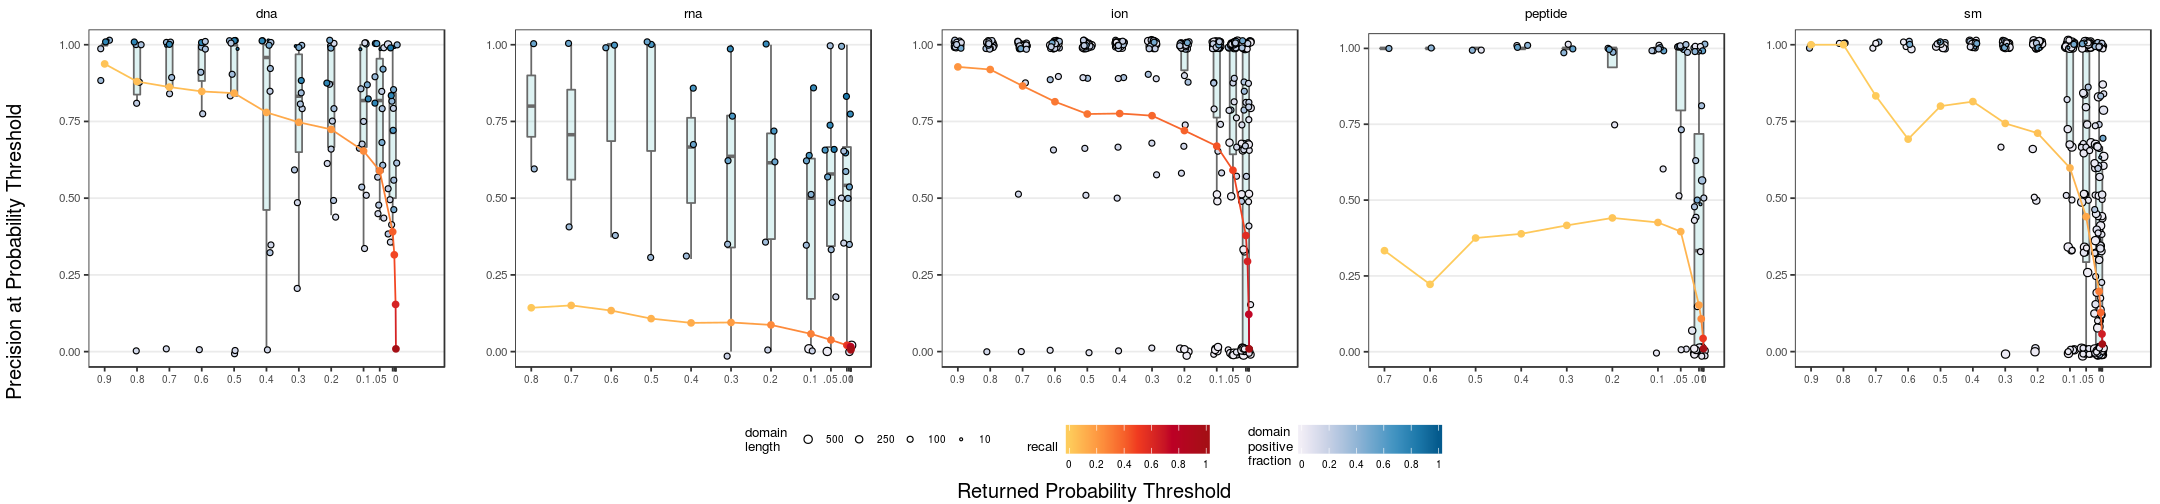

In [26]:
plots_list <- list()

for (i in 1:length(ligands_comb_list)) {
    ligand <- ligands_comb_list[[i]]
    filename <- paste0(ligand, "_",model, "_", table_type, ".csv")
    data_table <- read.csv(paste0(data_path, filename), header = TRUE, sep = '\t', row.names = 1)
    domain_filename <- paste0(ligand, "_domains_",model,"_", table_type,"_prob.csv")
    domain_data_table <- read.csv(paste0(data_path, domain_filename), header = TRUE, sep = '\t', row.names = 1)
    
    size_trans <- cut(domain_data_table[,"domain_len"], breaks=c(1,10,100,250,1000), labels=FALSE)
    domain_data_table$size_trans <- size_trans

    if (ligand == "rna") {

        plots_list[[i]] <- ggplot(data_table, aes(x=prob, y=precision, label=total, color=recall)) +
            scale_x_reverse(breaks = c(0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0), labels = c(0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, ".05", ".01", "", "", "", "", 0)) +
            coord_cartesian(xlim=c(0.8,-0.01), ylim=c(0,1)) +
            scale_color_gradientn("recall", limits = c(0,1), breaks=c(0,0.2,0.4,0.6,0.8,1), labels=c("0","0.2","0.4","0.6","0.8","1"), colours = colfunc(5), guide = "colourbar") +
            geom_boxplot(data=domain_data_table, aes(x=prob, y=domain_precison, group=prob), inherit.aes = FALSE, width = 0.02, fill="darkslategray3", color="dimgrey", alpha=0.25, outlier.shape=NA) +
            geom_jitter(data=domain_data_table, aes(x=prob, y=domain_precison, group=prob, size=size_trans, fill=pos_frac), inherit.aes = FALSE, shape=21, width=0.015, height=0.015) +
            scale_size("domain\nlength", breaks=c(4,3,2,1), labels=c("500","250", "100", "10"), range=c(0.5,2), limits=c(1,4)) +
            scale_fill_gradientn("domain\npositive\nfraction", colours=coldomain(7), breaks=c(0,0.2,0.4,0.6,0.8,1), labels=c("0","0.2","0.4","0.6","0.8","1"), limits=c(0,1)) +
            xlab("") +
            ylab("") +
            ggtitle(ligand) +
            geom_line() +
            geom_point() +
            #geom_text(aes(label=(total),hjust=0, vjust=0)) +
            theme_bw() +
            theme(plot.title = element_text(hjust=0.5, size=8),
                  axis.text.x = element_text(size=6),
                  axis.text.y = element_text(size=7),
                  legend.text=element_text(size=6),
                  legend.title=element_text(size=8),
                  panel.grid.minor = element_blank(),
                  panel.grid.major.x = element_blank())
        
    } else if (ligand == "peptide") {
        plots_list[[i]] <- ggplot(data_table, aes(x=prob, y=precision, label=total, color=recall)) +
            scale_x_reverse(breaks = c(0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0), labels = c(0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, ".05", ".01", "", "", "", "", 0)) +
            coord_cartesian(xlim=c(0.7,-0.01), ylim=c(0,1)) +
        scale_color_gradientn("recall", limits = c(0,1), breaks=c(0,0.2,0.4,0.6,0.8,1), labels=c("0","0.2","0.4","0.6","0.8","1"), colours = colfunc(5), guide = "colourbar") +
            geom_boxplot(data=domain_data_table, aes(x=prob, y=domain_precison, group=prob), inherit.aes = FALSE, width = 0.02, fill="darkslategray3", color="dimgrey", alpha=0.25, outlier.shape=NA) +
            geom_jitter(data=domain_data_table, aes(x=prob, y=domain_precison, group=prob, size=size_trans, fill=pos_frac), inherit.aes = FALSE, shape=21, width=0.015, height=0.015) +
            scale_size("domain\nlength", breaks=c(4,3,2,1), labels=c("500","250", "100", "10"), range=c(0.5,2), limits=c(1,4)) +
            scale_fill_gradientn("domain\npositive\nfraction", colours=coldomain(7), breaks=c(0,0.2,0.4,0.6,0.8,1), labels=c("0","0.2","0.4","0.6","0.8","1"), limits=c(0,1)) +
            xlab("") +
            ylab("") +
            ggtitle(ligand) +
            geom_line() +
            geom_point() +
            #geom_text(aes(label=(total),hjust=0, vjust=0)) +
            
            theme_bw() +
            theme(plot.title = element_text(hjust=0.5, size=8),
                  axis.text.x = element_text(size=6),
                  axis.text.y = element_text(size=7),
                  legend.text=element_text(size=6),
                  legend.title=element_text(size=8),
                  panel.grid.minor = element_blank(),
                  panel.grid.major.x = element_blank())

    } else {

        plots_list[[i]] <- ggplot(data_table, aes(x=prob, y=precision, label=total, color=recall)) +
            scale_x_reverse(breaks = c(0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0), labels = c(0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, ".05", "", "", "", "0")) +
            coord_cartesian(xlim=c(0.9,-0.1), ylim=c(0,1)) +
            scale_color_gradientn("recall", limits = c(0,1), breaks=c(0,0.2,0.4,0.6,0.8,1), labels=c("0","0.2","0.4","0.6","0.8","1"), colours = colfunc(5), guide = "colourbar") +
            geom_boxplot(data=domain_data_table, aes(x=prob, y=domain_precison, group=prob), inherit.aes = FALSE, width = 0.02, fill="darkslategray3", color="dimgrey", alpha=0.25, outlier.shape=NA) +
            geom_jitter(data=domain_data_table, aes(x=prob, y=domain_precison, group=prob, size=size_trans, fill=pos_frac), inherit.aes = FALSE, shape=21, width=0.015, height=0.015) +
            scale_size("domain\nlength", breaks=c(4,3,2,1), labels=c("500","250", "100", "10"), range=c(0.5,2), limits=c(1,4)) +
            scale_fill_gradientn("domain\npositive\nfraction", colours=coldomain(7), breaks=c(0,0.2,0.4,0.6,0.8,1), labels=c("0","0.2","0.4","0.6","0.8","1"), limits=c(0,1)) +
            xlab("") +
            ylab("") +
            ggtitle(ligand) +
            geom_line() +
            geom_point() +
            #geom_text(aes(label=(total),hjust=0, vjust=0)) +
            theme_bw() +
            theme(plot.title = element_text(hjust=0.5, size=8),
                  axis.text.x = element_text(size=6),
                  axis.text.y = element_text(size=7),
                  legend.text=element_text(size=6),
                  legend.title=element_text(size=8),
                  panel.grid.minor = element_blank(),
                  panel.grid.major.x = element_blank())
    }
}

options(repr.plot.width=18, repr.plot.height=4.2)
figure <- ggarrange(plotlist=plots_list, ncol = 5, nrow=1, common.legend = TRUE, legend="bottom")

final_fig <- annotate_figure(figure,
               bottom = text_grob("Returned Probability Threshold"),
               left = text_grob("Precision at Probability Threshold", rot = 90))
final_fig

In [27]:
ggexport(final_fig, filename="plots/ligands_XGB_tuned_not_stacked_precision_prob.png", width = 1800, height = 420, res=100)

file saved to plots/ligands_XGB_tuned_not_stacked_precision_prob.png


In [38]:
svg(filename="plots/ligands_XGB_tuned_not_stacked_precision_prob.svg", width = 18, height = 4.2)
options(repr.plot.width=18, repr.plot.height=4.2)
figure <- ggarrange(plotlist=plots_list, ncol = 5, nrow=1, common.legend = TRUE, legend="bottom")

final_fig <- annotate_figure(figure,
               bottom = text_grob("Returned Probability Threshold"),
               left = text_grob("Precision at Probability Threshold", rot = 90))
final_fig
dev.off()

png 
  2

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: svg?
   ^
